# Capstone2: Modeling - West Nile Virus (WNV) Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('CleanData_ForModeling.csv')
df.head()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0,4,34,0,3,2,1,0,0


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5718, 18)
(2451, 18)
(5718,)
(2451,)


### This is the classification problem of supervised learning. I will test following different models to this problem.

# 1. Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [6]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.959608
1,0.010,0.959608
2,0.100,0.959608
3,1.000,0.959608
4,10.000,0.959608
5,100.000,0.959608


In [7]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_lr)
Accuracy_lr=Logreg.score(X_test,y_test)
print(Accuracy_lr)
print(cnf_matrix)

0.9596083231334149
[[2352    0]
 [  99    0]]


### This shows that the model is not able to correctly identify any instances of the positive class (class 1). Let's try to use the cross validation

In [8]:
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.71677282 0.65795061 0.62680851 0.67914894 0.7287234 ]
Mean cross validation test score: 0.6818808567699233
Mean cross validation train score: 0.7415633609966366
Standard deviation in cv test scores: 0.0374826815297855


### This shows that using cross validation is important.

# 2. K-Nearest Neighbor(KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
N_neighbors_range = [3,5,10,25,50,100]

table = pd.DataFrame(columns = ['N_neighbors','Accuracy'])
table['N_neighbors'] = N_neighbors_range

j = 0
for i in N_neighbors_range:
    
    # Apply logistic regression model to training data
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    # Predict using model
    pred_knn = knn.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,pred_knn)
    j += 1
    
table  

,N_neighbors,Accuracy
0,3,0.943288
1,5,0.950224
2,10,0.957976
3,25,0.959608
4,50,0.959608
5,100,0.959608


### Looks like Accuracy is good enough at n_neighbors=10

In [11]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn= knn.predict(X_test)
print(accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))
Accuracy_knn=knn.score(X_test,y_test)
print(Accuracy_knn)
print(confusion_matrix(y_test, pred_knn))

0.9579763361893104
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2352
           1       0.25      0.02      0.04        99

    accuracy                           0.96      2451
   macro avg       0.61      0.51      0.51      2451
weighted avg       0.93      0.96      0.94      2451

0.9579763361893104
[[2346    6]
 [  97    2]]


In [12]:
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_test_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_knn))

[0.76268577 0.70823556 0.71739362 0.67702128 0.74845745]
Mean cross validation test score: 0.7227587344835866
Mean cross validation train score: 0.7924592431418291
Standard deviation in cv test scores: 0.030286018548647892


# 3. Support Vector Machine (SVM)

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
svm.fit(X_train, y_train)
pred_svm= svm.predict(X_test)
print(accuracy_score(y_test, pred_knn))
Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)
print(confusion_matrix(y_test, pred_svm))

0.9579763361893104
0.9596083231334149
[[2352    0]
 [  99    0]]


In [14]:
# from sklearn.model_selection import cross_val_score
# cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc', n_jobs=-1)
# cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc', n_jobs=-1)
# print(cv_scores_test)
# cv_scores_svm_test= cv_scores_test.mean()
# cv_scores_svm_train= cv_scores_train.mean()
# cv_scores_std_test_svm= cv_scores_test.std()
# print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
# print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
# print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_svm))

### For some reason, SVM took infinite time and I will be skipping this in the analysis.

# 4. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_test)
print(accuracy_score(y_test, pred_rf))
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)
print(confusion_matrix(y_test, pred_rf))

0.9596083231334149
0.9596083231334149
[[2352    0]
 [  99    0]]


In [16]:
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_test_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.85212314 0.81009051 0.80361702 0.81829787 0.87074468]
Mean cross validation test score: 0.8309746459250172
Mean cross validation train score: 0.8804463172600963
Standard deviation in cv test scores: 0.025977689665189742


# 5. Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
print(accuracy_score(y_test, pred_gbc))
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)
print(confusion_matrix(y_test, pred_gbc))

0.95593635250918
0.95593635250918
[[2334   18]
 [  90    9]]


In [18]:
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_test_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gbc))

[0.8388535  0.82606995 0.81542553 0.79308511 0.83787234]
Mean cross validation test score: 0.8222612867716113
Mean cross validation train score: 0.880431583180979
Standard deviation in cv test scores: 0.01692034053236856


# 6. Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, pred_nb))
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)
print(confusion_matrix(y_test, pred_nb))

0.6858425132598939
0.6858425132598939
[[1617  735]
 [  35   64]]


In [20]:
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_test_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_nb))

[0.7343949  0.73527768 0.68925532 0.74515957 0.77404255]
Mean cross validation test score: 0.7356260071849225
Mean cross validation train score: 0.7831453833033082
Standard deviation in cv test scores: 0.02727122132818364


# Comparison of Models

In [21]:
models = [ 'Logistic Regression','KNN', 'Random Forest','Gradient Boost', 'Naive Bayes']
#models2 = [ 'Logistic Regression','KNN','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_rf,Accuracy_gbc,Accuracy_nb]
score_tab_acc = pd.DataFrame(list(zip(models, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(models, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

print(score_tab)

             Algorithm  Model accuracy score
0  Logistic Regression              0.959608
1                  KNN              0.957976
2        Random Forest              0.959608
3       Gradient Boost              0.955936
4          Naive Bayes              0.685843
             Algorithm  ROC-AUC train score  ROC-AUC test score
0  Logistic Regression             0.741563            0.681881
1                  KNN             0.792459            0.722759
2        Random Forest             0.880446            0.830975
3       Gradient Boost             0.880432            0.822261
4          Naive Bayes             0.783145            0.735626


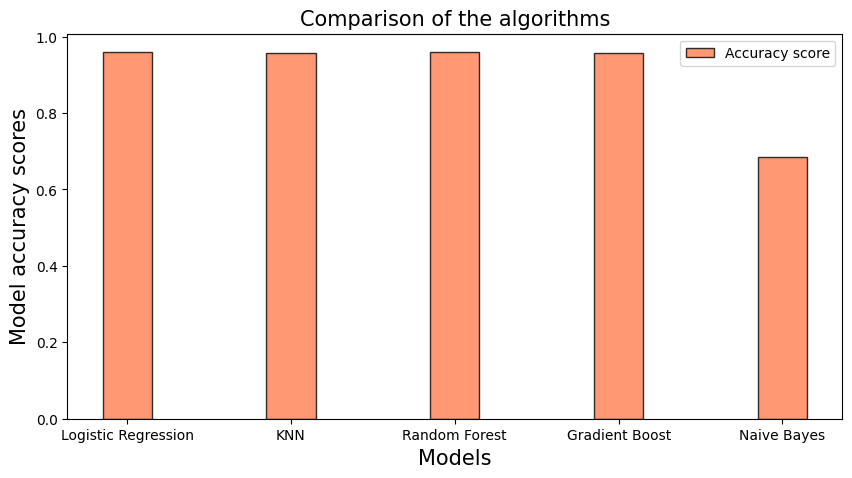

In [22]:
plt.figure(figsize=(10,5))
plt.bar(models,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
plt.legend()
plt.show()

In [23]:
# plt.figure(figsize=(10,5))
# plt.bar(models,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
# plt.bar(models,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
# plt.xlabel('Models',fontsize=15)
# plt.ylabel ('ROC-AUC scores',fontsize=15)
# plt.title('Comparison of the algorithms',fontsize=15)
# plt.legend()
# plt.show()

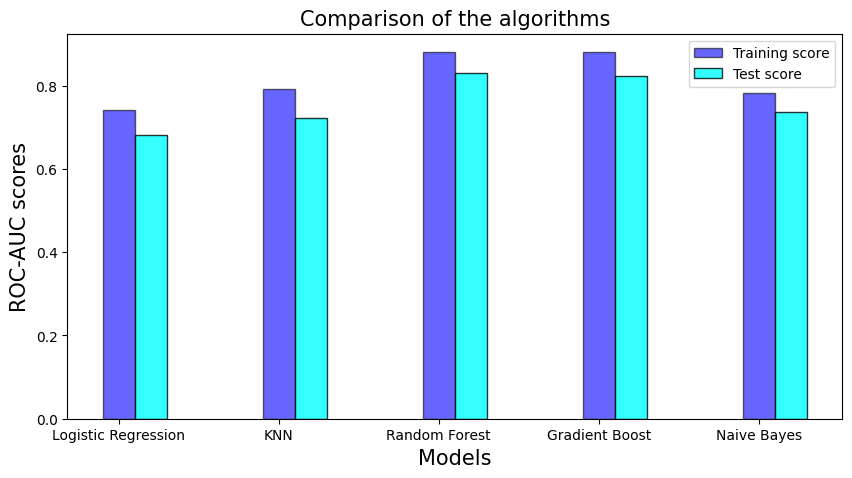

In [24]:
index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2,5.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5], models)
plt.legend()
plt.savefig("27.png")
plt.show()

# Random forest and Gradient Boosting Models are performing better. Next, I will do Hyperparameter Tuning with Random Forest model.

## Parameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(criterion='entropy', min_samples_split=12,
                       n_estimators=700, n_jobs=-1, random_state=1)
0.9512067156348373


## Fitting the model with optimal parameters.

In [26]:
rf = RandomForestClassifier(criterion='entropy', min_samples_split=12,
                       n_estimators=700, n_jobs=-1, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
cv_test = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv_test)
Accuracy_rf_optimal = rf.score(X_test,y_test)
print(Accuracy_rf_optimal)

0.9563443492452061
0.8297756839585073
0.9563443492452061


### WNV Prediction For different Temperature

In [27]:
target = pd.Series(y_pred_rf, name='West Nile Virus')
Tempr  = df['Tavg']

output = pd.DataFrame(list(zip(Tempr, target)), 
               columns =['Tavg', 'West Nile Virus']) 
output.to_csv('Tavg_rf.csv', index=False, header=True)

In [28]:
tempr_vs_wnv= pd.read_csv('Tavg_rf.csv')
tempr_vs_wnv

,Tavg,West Nile Virus
0,81.5,0
1,82.5,0
2,76.5,0
3,80.0,0
4,75.0,0
...,...,...
2446,80.0,0
2447,68.5,0
2448,55.0,0
2449,63.0,0


## Extracting Feature Importances

In [29]:
df

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0,4,34,0,3,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,42.017430,-87.687769,4,70.0,51.0,60.5,0.480,29.235,29.930,7.75,0,4,23,0,2,2,0,0,1
8165,42.017430,-87.687769,4,82.0,62.0,72.0,0.000,29.155,29.820,6.40,0,4,24,0,2,2,0,0,1
8166,42.017430,-87.687769,2,88.5,63.0,76.0,0.030,29.310,29.995,10.00,0,3,26,0,2,2,0,0,1
8167,42.017430,-87.687769,46,89.0,70.5,80.0,0.260,29.150,29.815,8.25,0,0,28,0,3,2,0,0,1


                          Features  Importance scores
0                         Latitude           0.000000
1                        Longitude           0.005084
2                     NumMosquitos           0.013050
3                             Tmax           0.013598
4                             Tmin           0.017175
5                             Tavg           0.018562
6                      PrecipTotal           0.023653
7                      StnPressure           0.027589
8                         SeaLevel           0.032180
9                         AvgSpeed           0.035538
10                       DayOfWeek           0.041630
11                      WeekNumber           0.043057
12                       IsWeekend           0.051750
13                         Quarter           0.052630
14                          Season           0.111235
15           Species_CULEX PIPIENS           0.114375
16  Species_CULEX PIPIENS/RESTUANS           0.128983
17          Species_CULEX RE

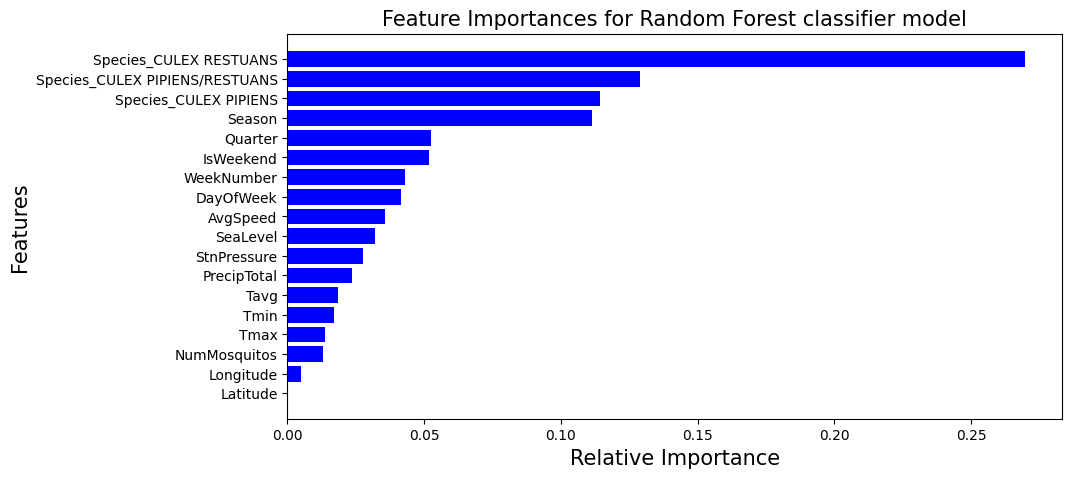

In [30]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()

## ROC AUC Score and ROC Curve

In [31]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.8489143132000275


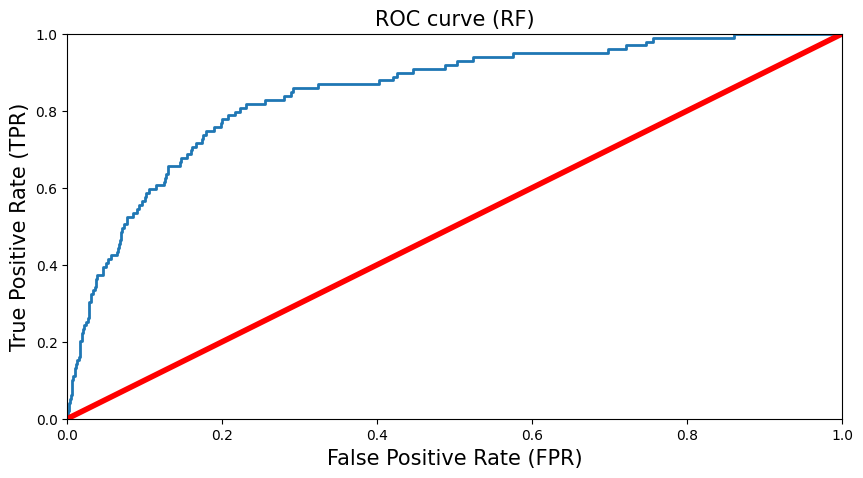

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()